In [1]:
import pandas as pd
import numpy as np
import gensim
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

C:\Users\fergu\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
dft = pd.read_csv('250k_full_lda_185.csv')
dft['article_words'] = [eval(item) for item in dft['article_words']]

In [6]:
filename = 'models/7passes_265_topics_ldamodel.id2word'
file = open(filename,'rb')
id2word = pickle.load(file)

lda_model = gensim.models.ldamodel.LdaModel.load('models/7passes_265_topics_ldamodel')
                                                 
filename = 'models/topics_dict.pkl'
file = open(filename,'rb')
topics_dict = pickle.load(file)                                                                                                                                                  

In [7]:
tech_labels = ['robots & robotics','meat substitutes','tech m&a','laptops, mobile devices, gadgets','audio tech',
              'climate science','digital advertising','ridesharing services e-scooters & e-bikes',
               'wireless charging technology','e-commerce & online delivery','apple devices','astrophysics',
               'automotive technology1','virtual reality','audio streaming and apps','virtual assistants, smart home tech',
              'data breaches & data privacy','data protection & govt intervention','drones & unmanned aerial tech',
              '5g % mobile networks','autonomous vehicles1','hacks & data theft','astrophysics','battery technology',
              'tech investments, vc, new initiatives1','space exploration','cryptocurrency','cybersecurity',
               'gene editing, genetic engineering','cutting-edge mobile devices, gadgets','quantum computing',
               'fintech & payments','microsoft apps, os, devices','earth sciences','faang','climate science & technology',
               'meteorology','automotive technology2','tech investments, vc, new initiatives2','artificial intelligence',
               'chips & processors','astronomy & astrophysics','software/service glitches, bugs & outages',
               'tech investments, vc, new initiatives3','nuclear tech','aviation & aerospace','code & software',
               'satellites & rockets','dark web & online privacy','autonomous vehicles1','surveillance tech',
               'mobile networks, carriers & eqpt','space exploration','apps, gadgets & devices'
              ]

health_labels = ['drugs, clinical trials, approvals','intl big business','marijuana & CBD',
             'menstrual health','cancer treatments & trials','food poisoning, allergies, household chemicals',
            'health insurance & washington legislation','organ donation','livestock viral diseases','skincare',
            'food & diet','fitness, exercise & diet','mood disorders','product recalls','sleep health','infectious diseases',
            'big tech govt intervention','sexual assault & harassment','health aspects of body art',
            'infant nutrition','smoking, vaping & e-cigs','bloodborne diseases & vaccines','medical devices',
             'bacteria & viruses','the human brain','blood and blood diseases','sex and relationships','clinical care',
             'birth control & reproductive health',"children's health",'lgbtq issues','mental health & disorders',
             'prescription drugs',
             
              ]

tech_health_labels = tech_labels + health_labels

## Visualize 2

In [21]:
start = '2018-05-12'
end = '2018-05-12'

mini_df = dft[(dft['date'] >= start) & (dft['date'] <= end)]
mini_df.shape

(27, 16)

In [22]:
def dummy_func(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_func,
    preprocessor=dummy_func,
    token_pattern=None,
    max_df=0.8,
    min_df=3,
    use_idf=True,)  

tfidf_matrix = tfidf.fit_transform(mini_df['article_words'])

dist = 1 - cosine_similarity(tfidf_matrix)

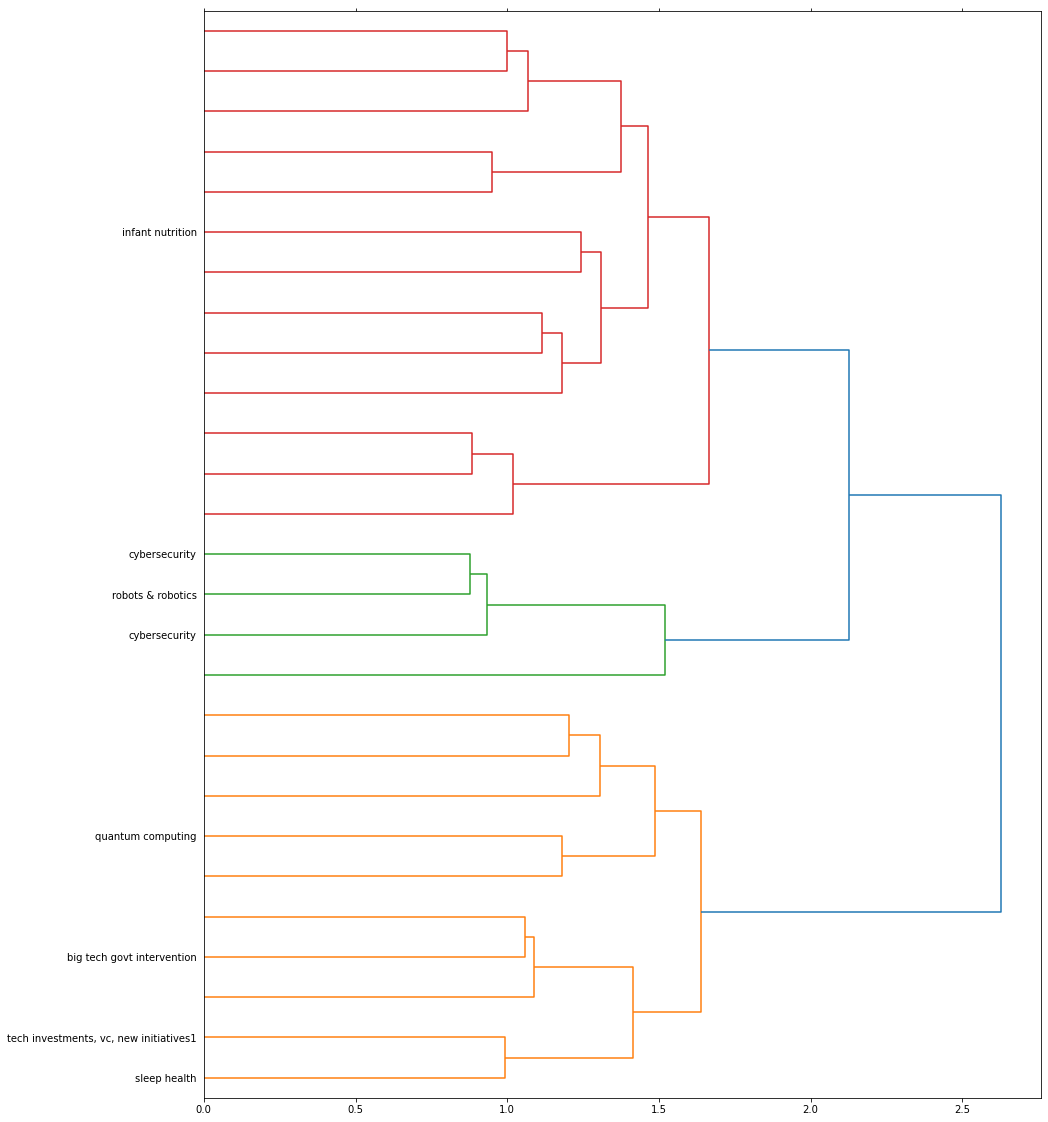

In [23]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size

lda_topics = [mini_df.iloc[i,14] for i in range(len(mini_df))]
label_names = [topics_dict[topic] for topic in lda_topics]
label_names = [label if label in tech_health_labels else '' for label in label_names]

ax = dendrogram(linkage_matrix, orientation="right", labels=label_names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout